# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

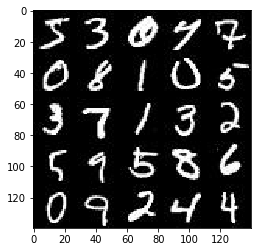

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

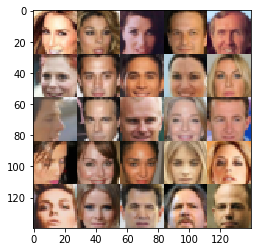

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels])
    z = tf.placeholder(tf.float32, [None, z_dim])
    learning_rate = tf.placeholder(tf.float32)

    return inputs, z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/Users/orange/anaconda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/Users/orange/anaconda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/Users/orange/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/Users/orange/anaconda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/Users/orange/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/Users/orange/anaconda/lib/python3.6/site-packages/zmq/eventloop

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [30]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope("discriminator", reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 3, strides=2, padding='same', kernel_initializer=
                             tf.contrib.layers.xavier_initializer())
        x1 = tf.maximum(alpha * x1, x1)
        #x1 = tf.nn.dropout(x1, 0.8)
        # 14x14x64
        
        x2 = tf.layers.conv2d(x1, 128, 3, strides=2, padding='same', kernel_initializer=
                             tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha*x2, x2)
        x2 = tf.nn.dropout(x2, 0.8)
        # 7x7x128
        
        x3 = tf.layers.conv2d(x2, 256, 3, strides=1, padding='same', kernel_initializer=
                             tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha*x3, x3)
        x3 = tf.nn.dropout(x3, 0.8)
        # 7x7x256
        
        # Flatten 
        flat = tf.reshape(x2, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [31]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 7*7*512)
        #reshape 
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        # 7x7x512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 3, strides=1, padding='same',
                                        kernel_initializer= tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x2, x2)
        # 7x7x256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 3, strides=1, padding='same', 
                                        kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha*x3, x3)
        # 7x7x128
        
        x4 = tf.layers.conv2d_transpose(x3, 64, 3, strides=2, padding='same', 
                                        kernel_initializer=tf.contrib.layers.xavier_initializer())
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha*x4, x4)
        # 14x14*64
        
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 3, strides=2, padding='same')
        # 28x28xout_channel_dim now
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [32]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    smooth = 0.1
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1-smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [33]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [34]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [35]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print_every = 10
    show_every = 100
    
    image_channels = data_shape[3]
#     print(data_shape) #num_images, width, height, channels
    inputs, z, lr = model_inputs(data_shape[1], data_shape[2], image_channels, z_dim)
    d_loss, g_loss = model_loss(inputs, z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    saver = tf.train.Saver()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                #rescale
                batch_images *= 2
                
                # Sample random noise for Generator
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
#                 print(batch_images.shape)
#                 print(inputs.get_shape())
#                 print(z.get_shape())
#                 print(batch_z.shape)
                _ = sess.run(d_opt, feed_dict={inputs: batch_images, z: batch_z})
                _ = sess.run(g_opt, feed_dict={z: batch_z, inputs: batch_images})
                
                if steps % print_every == 0:
                    train_loss_d = sess.run(d_loss, feed_dict={inputs:batch_images, z: batch_z})
                    train_loss_g = sess.run(g_loss, feed_dict={z:batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.4f}".format(train_loss_d),
                         "Generator Loss: {:.4f}".format(train_loss_g))
                if steps % show_every == 0:
                    show_generator_output(sess, 16, z, image_channels, data_image_mode)
        
        saver.save(sess, "./checkpoints/generator.ckpt")
        
    return

### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch 1/2... Discriminator Loss: 2.7008 Generator Loss: 0.1551
Epoch 1/2... Discriminator Loss: 1.7835 Generator Loss: 0.3213
Epoch 1/2... Discriminator Loss: 2.1489 Generator Loss: 0.1990
Epoch 1/2... Discriminator Loss: 2.0752 Generator Loss: 0.3035
Epoch 1/2... Discriminator Loss: 1.8671 Generator Loss: 0.3077
Epoch 1/2... Discriminator Loss: 1.5501 Generator Loss: 1.1966
Epoch 1/2... Discriminator Loss: 1.9776 Generator Loss: 0.2841
Epoch 1/2... Discriminator Loss: 2.0096 Generator Loss: 0.4707
Epoch 1/2... Discriminator Loss: 1.6902 Generator Loss: 0.6037
Epoch 1/2... Discriminator Loss: 2.4116 Generator Loss: 0.6754


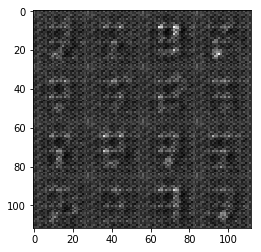

Epoch 1/2... Discriminator Loss: 2.2133 Generator Loss: 0.3686
Epoch 1/2... Discriminator Loss: 1.3436 Generator Loss: 1.1684
Epoch 1/2... Discriminator Loss: 1.3414 Generator Loss: 0.8826
Epoch 1/2... Discriminator Loss: 1.5490 Generator Loss: 0.8349
Epoch 1/2... Discriminator Loss: 1.8341 Generator Loss: 0.3927
Epoch 1/2... Discriminator Loss: 1.4805 Generator Loss: 0.6193
Epoch 1/2... Discriminator Loss: 2.2121 Generator Loss: 0.2462
Epoch 1/2... Discriminator Loss: 1.4561 Generator Loss: 0.8436
Epoch 1/2... Discriminator Loss: 2.1476 Generator Loss: 0.2845
Epoch 1/2... Discriminator Loss: 1.4665 Generator Loss: 1.7722


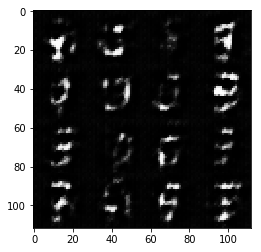

Epoch 1/2... Discriminator Loss: 1.6059 Generator Loss: 0.6539
Epoch 1/2... Discriminator Loss: 1.2914 Generator Loss: 1.0243
Epoch 1/2... Discriminator Loss: 1.2956 Generator Loss: 1.2788
Epoch 1/2... Discriminator Loss: 1.7874 Generator Loss: 0.7564
Epoch 1/2... Discriminator Loss: 1.8460 Generator Loss: 0.3065
Epoch 1/2... Discriminator Loss: 1.5465 Generator Loss: 0.7611
Epoch 1/2... Discriminator Loss: 1.1603 Generator Loss: 1.4516
Epoch 1/2... Discriminator Loss: 1.7539 Generator Loss: 0.4431
Epoch 1/2... Discriminator Loss: 1.7872 Generator Loss: 0.8770
Epoch 1/2... Discriminator Loss: 1.3808 Generator Loss: 0.9466


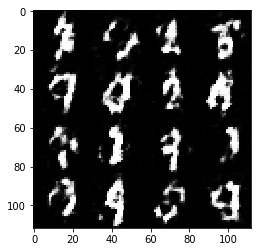

Epoch 1/2... Discriminator Loss: 1.1160 Generator Loss: 1.0879
Epoch 1/2... Discriminator Loss: 1.4428 Generator Loss: 1.3557
Epoch 1/2... Discriminator Loss: 1.0832 Generator Loss: 1.2311
Epoch 1/2... Discriminator Loss: 1.5132 Generator Loss: 0.6476
Epoch 1/2... Discriminator Loss: 1.3605 Generator Loss: 2.1192
Epoch 1/2... Discriminator Loss: 1.0937 Generator Loss: 1.2122
Epoch 1/2... Discriminator Loss: 1.6687 Generator Loss: 0.4974
Epoch 1/2... Discriminator Loss: 1.1604 Generator Loss: 0.7685
Epoch 1/2... Discriminator Loss: 1.1955 Generator Loss: 1.0792
Epoch 1/2... Discriminator Loss: 1.6657 Generator Loss: 0.3953


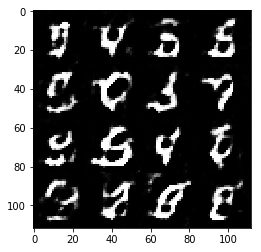

Epoch 1/2... Discriminator Loss: 1.1393 Generator Loss: 1.0957
Epoch 1/2... Discriminator Loss: 1.1895 Generator Loss: 1.1081
Epoch 1/2... Discriminator Loss: 1.6337 Generator Loss: 0.5250
Epoch 1/2... Discriminator Loss: 1.1401 Generator Loss: 1.0936
Epoch 1/2... Discriminator Loss: 1.1048 Generator Loss: 1.0373
Epoch 1/2... Discriminator Loss: 1.2322 Generator Loss: 1.0204
Epoch 1/2... Discriminator Loss: 1.1343 Generator Loss: 1.3564
Epoch 1/2... Discriminator Loss: 1.2500 Generator Loss: 0.7416
Epoch 1/2... Discriminator Loss: 1.2320 Generator Loss: 0.7274
Epoch 1/2... Discriminator Loss: 1.2471 Generator Loss: 0.7408


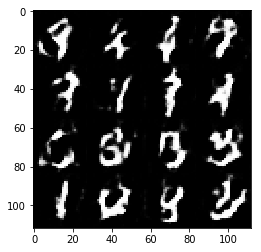

Epoch 1/2... Discriminator Loss: 1.2231 Generator Loss: 1.1507
Epoch 1/2... Discriminator Loss: 1.1836 Generator Loss: 1.3799
Epoch 1/2... Discriminator Loss: 1.2474 Generator Loss: 0.9717
Epoch 1/2... Discriminator Loss: 1.2809 Generator Loss: 1.3000
Epoch 1/2... Discriminator Loss: 1.4604 Generator Loss: 0.7057
Epoch 1/2... Discriminator Loss: 1.3664 Generator Loss: 1.0690
Epoch 1/2... Discriminator Loss: 1.3059 Generator Loss: 0.9632
Epoch 1/2... Discriminator Loss: 1.2349 Generator Loss: 0.7616
Epoch 1/2... Discriminator Loss: 1.1524 Generator Loss: 1.2118
Epoch 1/2... Discriminator Loss: 1.2655 Generator Loss: 1.0758


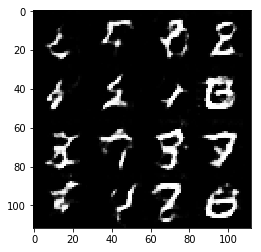

Epoch 1/2... Discriminator Loss: 1.3201 Generator Loss: 0.6046
Epoch 1/2... Discriminator Loss: 1.4664 Generator Loss: 0.5533
Epoch 1/2... Discriminator Loss: 1.2959 Generator Loss: 0.8467
Epoch 1/2... Discriminator Loss: 4.4708 Generator Loss: 5.8350
Epoch 1/2... Discriminator Loss: 1.8063 Generator Loss: 0.4076
Epoch 1/2... Discriminator Loss: 1.4561 Generator Loss: 0.5982
Epoch 1/2... Discriminator Loss: 1.6247 Generator Loss: 0.4397
Epoch 1/2... Discriminator Loss: 1.7614 Generator Loss: 0.5027
Epoch 1/2... Discriminator Loss: 1.4098 Generator Loss: 0.7145
Epoch 1/2... Discriminator Loss: 1.1888 Generator Loss: 0.8701


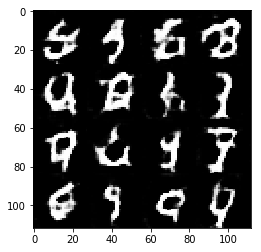

Epoch 1/2... Discriminator Loss: 2.0419 Generator Loss: 0.2841
Epoch 1/2... Discriminator Loss: 1.4295 Generator Loss: 0.9097
Epoch 1/2... Discriminator Loss: 1.0748 Generator Loss: 0.9736
Epoch 1/2... Discriminator Loss: 1.2078 Generator Loss: 1.8947
Epoch 1/2... Discriminator Loss: 1.2878 Generator Loss: 1.4818
Epoch 1/2... Discriminator Loss: 1.2365 Generator Loss: 1.1710
Epoch 1/2... Discriminator Loss: 1.3421 Generator Loss: 0.6237
Epoch 1/2... Discriminator Loss: 2.1207 Generator Loss: 0.2429
Epoch 1/2... Discriminator Loss: 1.5125 Generator Loss: 1.0992
Epoch 1/2... Discriminator Loss: 1.6996 Generator Loss: 1.1889


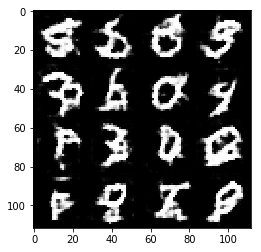

Epoch 1/2... Discriminator Loss: 1.2464 Generator Loss: 0.9433
Epoch 1/2... Discriminator Loss: 1.1565 Generator Loss: 1.0206
Epoch 1/2... Discriminator Loss: 1.4107 Generator Loss: 1.2628
Epoch 1/2... Discriminator Loss: 1.0829 Generator Loss: 1.0089
Epoch 1/2... Discriminator Loss: 1.1166 Generator Loss: 1.0276
Epoch 1/2... Discriminator Loss: 1.6807 Generator Loss: 0.3945
Epoch 1/2... Discriminator Loss: 2.7876 Generator Loss: 2.4282
Epoch 1/2... Discriminator Loss: 1.4530 Generator Loss: 0.7028
Epoch 1/2... Discriminator Loss: 2.0178 Generator Loss: 0.4092
Epoch 1/2... Discriminator Loss: 1.8357 Generator Loss: 0.4441


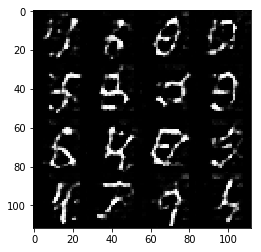

Epoch 1/2... Discriminator Loss: 1.9281 Generator Loss: 2.4075
Epoch 1/2... Discriminator Loss: 1.0650 Generator Loss: 1.9359
Epoch 1/2... Discriminator Loss: 1.2720 Generator Loss: 0.9761
Epoch 2/2... Discriminator Loss: 1.2629 Generator Loss: 0.7454
Epoch 2/2... Discriminator Loss: 1.0827 Generator Loss: 1.1446
Epoch 2/2... Discriminator Loss: 1.1101 Generator Loss: 0.9155
Epoch 2/2... Discriminator Loss: 1.0577 Generator Loss: 1.1702
Epoch 2/2... Discriminator Loss: 1.3450 Generator Loss: 0.7212
Epoch 2/2... Discriminator Loss: 1.2597 Generator Loss: 1.0851
Epoch 2/2... Discriminator Loss: 2.9588 Generator Loss: 3.1364


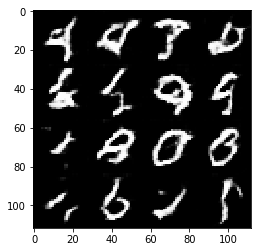

Epoch 2/2... Discriminator Loss: 1.4277 Generator Loss: 0.6669
Epoch 2/2... Discriminator Loss: 0.9841 Generator Loss: 1.0448
Epoch 2/2... Discriminator Loss: 1.3436 Generator Loss: 1.4874
Epoch 2/2... Discriminator Loss: 1.1396 Generator Loss: 0.9594
Epoch 2/2... Discriminator Loss: 1.4117 Generator Loss: 0.6209
Epoch 2/2... Discriminator Loss: 1.2512 Generator Loss: 1.1814
Epoch 2/2... Discriminator Loss: 1.3395 Generator Loss: 0.8980
Epoch 2/2... Discriminator Loss: 1.1837 Generator Loss: 0.7653
Epoch 2/2... Discriminator Loss: 1.3043 Generator Loss: 1.1947
Epoch 2/2... Discriminator Loss: 1.4865 Generator Loss: 0.4747


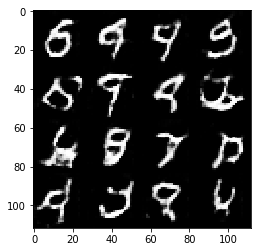

Epoch 2/2... Discriminator Loss: 1.2028 Generator Loss: 0.6833
Epoch 2/2... Discriminator Loss: 1.6086 Generator Loss: 0.5264
Epoch 2/2... Discriminator Loss: 1.1974 Generator Loss: 1.0659
Epoch 2/2... Discriminator Loss: 1.1391 Generator Loss: 1.2210
Epoch 2/2... Discriminator Loss: 1.4530 Generator Loss: 0.6428
Epoch 2/2... Discriminator Loss: 1.4287 Generator Loss: 1.8392
Epoch 2/2... Discriminator Loss: 1.1712 Generator Loss: 0.9313
Epoch 2/2... Discriminator Loss: 1.4103 Generator Loss: 1.1289
Epoch 2/2... Discriminator Loss: 1.2659 Generator Loss: 0.9265
Epoch 2/2... Discriminator Loss: 1.1051 Generator Loss: 0.9570


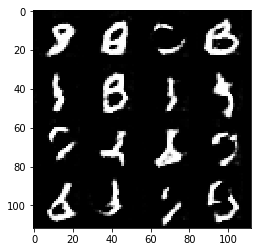

Epoch 2/2... Discriminator Loss: 1.0929 Generator Loss: 1.0162
Epoch 2/2... Discriminator Loss: 1.2694 Generator Loss: 1.2225
Epoch 2/2... Discriminator Loss: 1.3705 Generator Loss: 1.3364
Epoch 2/2... Discriminator Loss: 1.0520 Generator Loss: 1.5780
Epoch 2/2... Discriminator Loss: 1.5768 Generator Loss: 1.7415
Epoch 2/2... Discriminator Loss: 1.2819 Generator Loss: 0.7066
Epoch 2/2... Discriminator Loss: 2.3241 Generator Loss: 0.1958
Epoch 2/2... Discriminator Loss: 1.6760 Generator Loss: 0.3936
Epoch 2/2... Discriminator Loss: 1.2224 Generator Loss: 0.9610
Epoch 2/2... Discriminator Loss: 1.2257 Generator Loss: 1.4149


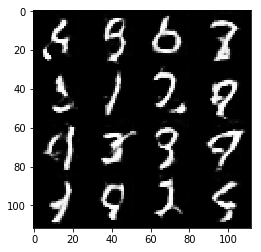

Epoch 2/2... Discriminator Loss: 1.2574 Generator Loss: 0.6800
Epoch 2/2... Discriminator Loss: 1.3843 Generator Loss: 0.9973
Epoch 2/2... Discriminator Loss: 1.2653 Generator Loss: 0.8892
Epoch 2/2... Discriminator Loss: 1.0695 Generator Loss: 0.9660
Epoch 2/2... Discriminator Loss: 1.3651 Generator Loss: 1.0580
Epoch 2/2... Discriminator Loss: 1.3466 Generator Loss: 0.7262
Epoch 2/2... Discriminator Loss: 1.2433 Generator Loss: 1.4135
Epoch 2/2... Discriminator Loss: 1.5569 Generator Loss: 2.0429
Epoch 2/2... Discriminator Loss: 1.3212 Generator Loss: 0.8685
Epoch 2/2... Discriminator Loss: 2.2001 Generator Loss: 0.2344


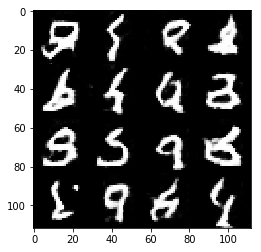

Epoch 2/2... Discriminator Loss: 1.4301 Generator Loss: 0.7265
Epoch 2/2... Discriminator Loss: 1.5368 Generator Loss: 0.6446
Epoch 2/2... Discriminator Loss: 1.4140 Generator Loss: 0.7225
Epoch 2/2... Discriminator Loss: 1.1698 Generator Loss: 1.0291
Epoch 2/2... Discriminator Loss: 1.2718 Generator Loss: 1.0648
Epoch 2/2... Discriminator Loss: 1.2267 Generator Loss: 0.6970
Epoch 2/2... Discriminator Loss: 1.7510 Generator Loss: 0.6008
Epoch 2/2... Discriminator Loss: 1.1154 Generator Loss: 1.0614
Epoch 2/2... Discriminator Loss: 1.4155 Generator Loss: 0.5776
Epoch 2/2... Discriminator Loss: 1.2343 Generator Loss: 0.9056


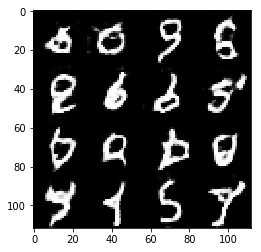

Epoch 2/2... Discriminator Loss: 1.3090 Generator Loss: 0.8430
Epoch 2/2... Discriminator Loss: 1.3059 Generator Loss: 1.1522
Epoch 2/2... Discriminator Loss: 1.0343 Generator Loss: 1.0876
Epoch 2/2... Discriminator Loss: 1.0867 Generator Loss: 0.9229
Epoch 2/2... Discriminator Loss: 0.9742 Generator Loss: 1.6130
Epoch 2/2... Discriminator Loss: 1.4094 Generator Loss: 1.3154
Epoch 2/2... Discriminator Loss: 1.0881 Generator Loss: 0.9444
Epoch 2/2... Discriminator Loss: 1.7994 Generator Loss: 0.4235
Epoch 2/2... Discriminator Loss: 1.4814 Generator Loss: 1.3153
Epoch 2/2... Discriminator Loss: 1.1289 Generator Loss: 1.0524


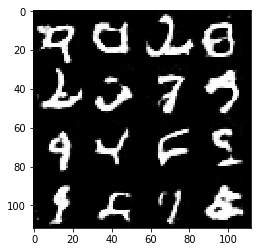

Epoch 2/2... Discriminator Loss: 1.1715 Generator Loss: 0.8274
Epoch 2/2... Discriminator Loss: 1.2520 Generator Loss: 1.2974
Epoch 2/2... Discriminator Loss: 1.3387 Generator Loss: 0.6650
Epoch 2/2... Discriminator Loss: 1.3205 Generator Loss: 0.6204
Epoch 2/2... Discriminator Loss: 1.6917 Generator Loss: 0.4460
Epoch 2/2... Discriminator Loss: 1.1267 Generator Loss: 1.2367
Epoch 2/2... Discriminator Loss: 1.1888 Generator Loss: 0.8654
Epoch 2/2... Discriminator Loss: 1.2193 Generator Loss: 0.8360
Epoch 2/2... Discriminator Loss: 1.1995 Generator Loss: 1.1327
Epoch 2/2... Discriminator Loss: 1.3172 Generator Loss: 0.6376


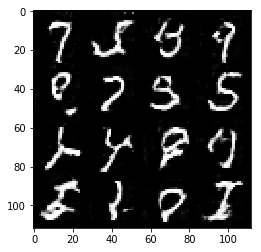

Epoch 2/2... Discriminator Loss: 1.1379 Generator Loss: 0.9435
Epoch 2/2... Discriminator Loss: 1.0853 Generator Loss: 1.0641
Epoch 2/2... Discriminator Loss: 1.2626 Generator Loss: 0.8034
Epoch 2/2... Discriminator Loss: 1.4404 Generator Loss: 0.5896
Epoch 2/2... Discriminator Loss: 1.3069 Generator Loss: 1.1910
Epoch 2/2... Discriminator Loss: 1.1486 Generator Loss: 1.0608
Epoch 2/2... Discriminator Loss: 1.3148 Generator Loss: 0.6730
Epoch 2/2... Discriminator Loss: 1.5111 Generator Loss: 0.5249
Epoch 2/2... Discriminator Loss: 1.0933 Generator Loss: 0.8416
Epoch 2/2... Discriminator Loss: 1.3560 Generator Loss: 0.8394


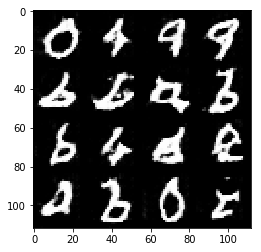

Epoch 2/2... Discriminator Loss: 1.6113 Generator Loss: 0.4558
Epoch 2/2... Discriminator Loss: 1.4229 Generator Loss: 1.1109
Epoch 2/2... Discriminator Loss: 1.4632 Generator Loss: 0.5738
Epoch 2/2... Discriminator Loss: 1.2077 Generator Loss: 0.8914
Epoch 2/2... Discriminator Loss: 1.6032 Generator Loss: 0.5867
Epoch 2/2... Discriminator Loss: 1.2456 Generator Loss: 0.9868
Epoch 2/2... Discriminator Loss: 1.0654 Generator Loss: 1.0764


In [36]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/1... Discriminator Loss: 4.7127 Generator Loss: 0.0238
Epoch 1/1... Discriminator Loss: 2.9135 Generator Loss: 0.1337
Epoch 1/1... Discriminator Loss: 0.9856 Generator Loss: 1.1415
Epoch 1/1... Discriminator Loss: 3.6835 Generator Loss: 0.0639
Epoch 1/1... Discriminator Loss: 1.4719 Generator Loss: 1.0416
Epoch 1/1... Discriminator Loss: 1.7530 Generator Loss: 0.6482
Epoch 1/1... Discriminator Loss: 2.8007 Generator Loss: 0.1317
Epoch 1/1... Discriminator Loss: 2.3399 Generator Loss: 1.9139
Epoch 1/1... Discriminator Loss: 2.0142 Generator Loss: 1.2289
Epoch 1/1... Discriminator Loss: 2.1752 Generator Loss: 1.4874


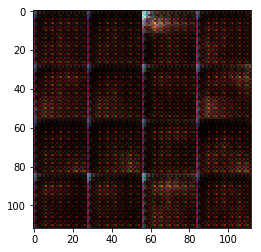

Epoch 1/1... Discriminator Loss: 1.6757 Generator Loss: 1.7522
Epoch 1/1... Discriminator Loss: 1.2974 Generator Loss: 1.4352
Epoch 1/1... Discriminator Loss: 1.7206 Generator Loss: 0.4358
Epoch 1/1... Discriminator Loss: 2.3201 Generator Loss: 0.2197
Epoch 1/1... Discriminator Loss: 1.0818 Generator Loss: 1.4986
Epoch 1/1... Discriminator Loss: 2.3620 Generator Loss: 0.2615
Epoch 1/1... Discriminator Loss: 1.8170 Generator Loss: 0.7158
Epoch 1/1... Discriminator Loss: 2.5022 Generator Loss: 0.3369
Epoch 1/1... Discriminator Loss: 1.3071 Generator Loss: 0.9882
Epoch 1/1... Discriminator Loss: 1.7222 Generator Loss: 0.7567


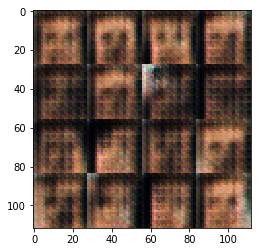

Epoch 1/1... Discriminator Loss: 1.7681 Generator Loss: 0.8738
Epoch 1/1... Discriminator Loss: 1.5061 Generator Loss: 1.2963
Epoch 1/1... Discriminator Loss: 2.0724 Generator Loss: 2.1826
Epoch 1/1... Discriminator Loss: 1.9858 Generator Loss: 0.3029
Epoch 1/1... Discriminator Loss: 1.5201 Generator Loss: 0.9766
Epoch 1/1... Discriminator Loss: 1.8108 Generator Loss: 1.8641
Epoch 1/1... Discriminator Loss: 1.6471 Generator Loss: 1.1328
Epoch 1/1... Discriminator Loss: 1.3717 Generator Loss: 1.8196
Epoch 1/1... Discriminator Loss: 1.9540 Generator Loss: 0.4440
Epoch 1/1... Discriminator Loss: 1.5262 Generator Loss: 0.7263


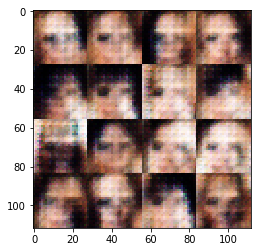

Epoch 1/1... Discriminator Loss: 1.6557 Generator Loss: 1.2624
Epoch 1/1... Discriminator Loss: 2.4934 Generator Loss: 0.1183
Epoch 1/1... Discriminator Loss: 1.9014 Generator Loss: 0.3907
Epoch 1/1... Discriminator Loss: 1.8301 Generator Loss: 0.4082
Epoch 1/1... Discriminator Loss: 1.4822 Generator Loss: 0.9194
Epoch 1/1... Discriminator Loss: 1.5562 Generator Loss: 0.5458
Epoch 1/1... Discriminator Loss: 1.6711 Generator Loss: 0.4563
Epoch 1/1... Discriminator Loss: 1.2841 Generator Loss: 0.8774
Epoch 1/1... Discriminator Loss: 1.2512 Generator Loss: 1.1674
Epoch 1/1... Discriminator Loss: 1.5454 Generator Loss: 1.2041


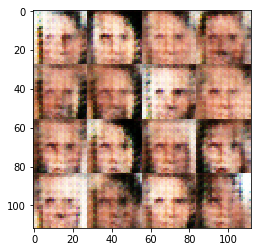

Epoch 1/1... Discriminator Loss: 1.4416 Generator Loss: 0.8993
Epoch 1/1... Discriminator Loss: 2.4167 Generator Loss: 0.1453
Epoch 1/1... Discriminator Loss: 1.3983 Generator Loss: 0.8765
Epoch 1/1... Discriminator Loss: 1.0838 Generator Loss: 1.7428
Epoch 1/1... Discriminator Loss: 1.5932 Generator Loss: 2.7028
Epoch 1/1... Discriminator Loss: 1.4609 Generator Loss: 0.9872
Epoch 1/1... Discriminator Loss: 1.5907 Generator Loss: 0.5517
Epoch 1/1... Discriminator Loss: 1.7097 Generator Loss: 0.5092
Epoch 1/1... Discriminator Loss: 1.2535 Generator Loss: 1.6161
Epoch 1/1... Discriminator Loss: 1.7586 Generator Loss: 0.6503


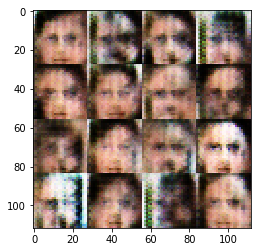

Epoch 1/1... Discriminator Loss: 1.2242 Generator Loss: 1.1515
Epoch 1/1... Discriminator Loss: 1.2945 Generator Loss: 1.9107
Epoch 1/1... Discriminator Loss: 1.4067 Generator Loss: 2.7778
Epoch 1/1... Discriminator Loss: 1.3985 Generator Loss: 1.2028
Epoch 1/1... Discriminator Loss: 1.3993 Generator Loss: 1.1940
Epoch 1/1... Discriminator Loss: 1.7490 Generator Loss: 0.5299
Epoch 1/1... Discriminator Loss: 1.5142 Generator Loss: 0.4959
Epoch 1/1... Discriminator Loss: 1.3683 Generator Loss: 1.1709
Epoch 1/1... Discriminator Loss: 1.9476 Generator Loss: 0.9280
Epoch 1/1... Discriminator Loss: 2.8608 Generator Loss: 0.1450


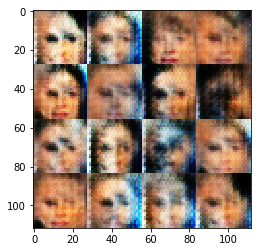

Epoch 1/1... Discriminator Loss: 1.5993 Generator Loss: 0.6299
Epoch 1/1... Discriminator Loss: 1.8675 Generator Loss: 0.7091
Epoch 1/1... Discriminator Loss: 1.1856 Generator Loss: 0.7800
Epoch 1/1... Discriminator Loss: 1.2836 Generator Loss: 0.9064
Epoch 1/1... Discriminator Loss: 1.5965 Generator Loss: 0.5727
Epoch 1/1... Discriminator Loss: 1.2561 Generator Loss: 1.1005
Epoch 1/1... Discriminator Loss: 1.2055 Generator Loss: 2.1799
Epoch 1/1... Discriminator Loss: 1.9403 Generator Loss: 2.3797
Epoch 1/1... Discriminator Loss: 1.6171 Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 1.3256 Generator Loss: 0.6575


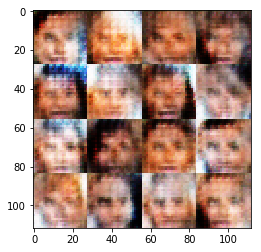

Epoch 1/1... Discriminator Loss: 1.6627 Generator Loss: 0.6302
Epoch 1/1... Discriminator Loss: 1.1776 Generator Loss: 1.2384
Epoch 1/1... Discriminator Loss: 2.4072 Generator Loss: 0.2958
Epoch 1/1... Discriminator Loss: 1.1333 Generator Loss: 1.2877
Epoch 1/1... Discriminator Loss: 1.3217 Generator Loss: 1.3658
Epoch 1/1... Discriminator Loss: 2.3200 Generator Loss: 0.2088
Epoch 1/1... Discriminator Loss: 1.5562 Generator Loss: 0.6510
Epoch 1/1... Discriminator Loss: 1.5196 Generator Loss: 0.8410
Epoch 1/1... Discriminator Loss: 2.0016 Generator Loss: 2.2100
Epoch 1/1... Discriminator Loss: 1.1443 Generator Loss: 1.0763


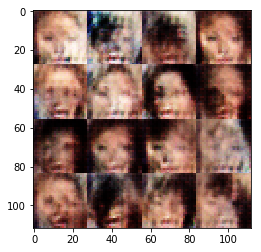

Epoch 1/1... Discriminator Loss: 1.7280 Generator Loss: 1.1521
Epoch 1/1... Discriminator Loss: 1.5317 Generator Loss: 0.6553
Epoch 1/1... Discriminator Loss: 1.9092 Generator Loss: 0.3659
Epoch 1/1... Discriminator Loss: 2.0930 Generator Loss: 0.1749
Epoch 1/1... Discriminator Loss: 1.3870 Generator Loss: 0.6923
Epoch 1/1... Discriminator Loss: 1.7423 Generator Loss: 0.6200
Epoch 1/1... Discriminator Loss: 2.0779 Generator Loss: 0.2995
Epoch 1/1... Discriminator Loss: 1.2993 Generator Loss: 1.2354
Epoch 1/1... Discriminator Loss: 1.0820 Generator Loss: 1.6734
Epoch 1/1... Discriminator Loss: 1.6911 Generator Loss: 0.9673


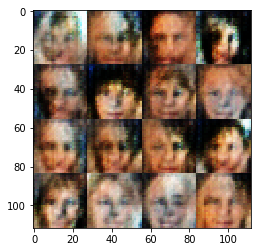

Epoch 1/1... Discriminator Loss: 1.9466 Generator Loss: 1.1998
Epoch 1/1... Discriminator Loss: 1.6994 Generator Loss: 0.5052
Epoch 1/1... Discriminator Loss: 1.6136 Generator Loss: 0.6198
Epoch 1/1... Discriminator Loss: 1.7248 Generator Loss: 0.4877
Epoch 1/1... Discriminator Loss: 1.5770 Generator Loss: 0.9467
Epoch 1/1... Discriminator Loss: 1.8084 Generator Loss: 0.4682
Epoch 1/1... Discriminator Loss: 1.6966 Generator Loss: 1.0669
Epoch 1/1... Discriminator Loss: 1.5531 Generator Loss: 1.1663
Epoch 1/1... Discriminator Loss: 1.2816 Generator Loss: 0.9918
Epoch 1/1... Discriminator Loss: 1.2573 Generator Loss: 1.0048


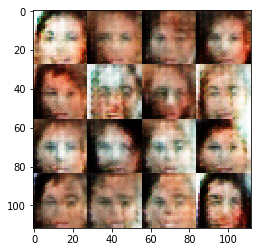

Epoch 1/1... Discriminator Loss: 1.5962 Generator Loss: 0.6759
Epoch 1/1... Discriminator Loss: 1.7066 Generator Loss: 0.7564
Epoch 1/1... Discriminator Loss: 1.3257 Generator Loss: 1.0797
Epoch 1/1... Discriminator Loss: 1.5492 Generator Loss: 0.9694
Epoch 1/1... Discriminator Loss: 1.7413 Generator Loss: 0.6144
Epoch 1/1... Discriminator Loss: 1.4780 Generator Loss: 0.5333
Epoch 1/1... Discriminator Loss: 1.2196 Generator Loss: 0.8448
Epoch 1/1... Discriminator Loss: 1.7027 Generator Loss: 0.4797
Epoch 1/1... Discriminator Loss: 1.7118 Generator Loss: 0.4443
Epoch 1/1... Discriminator Loss: 1.3258 Generator Loss: 0.5880


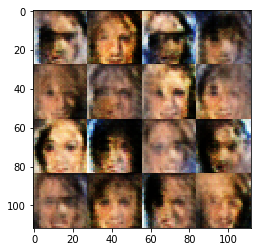

Epoch 1/1... Discriminator Loss: 1.5851 Generator Loss: 0.6315
Epoch 1/1... Discriminator Loss: 1.5771 Generator Loss: 0.4204
Epoch 1/1... Discriminator Loss: 1.4785 Generator Loss: 0.4991
Epoch 1/1... Discriminator Loss: 1.7850 Generator Loss: 0.9027
Epoch 1/1... Discriminator Loss: 1.8084 Generator Loss: 0.4612
Epoch 1/1... Discriminator Loss: 1.7296 Generator Loss: 0.6008
Epoch 1/1... Discriminator Loss: 1.6091 Generator Loss: 0.6834
Epoch 1/1... Discriminator Loss: 2.2197 Generator Loss: 0.6628
Epoch 1/1... Discriminator Loss: 1.4080 Generator Loss: 0.5068
Epoch 1/1... Discriminator Loss: 1.6646 Generator Loss: 0.6122


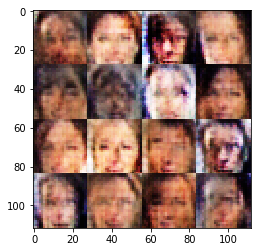

Epoch 1/1... Discriminator Loss: 1.5323 Generator Loss: 1.0370
Epoch 1/1... Discriminator Loss: 1.6024 Generator Loss: 1.3493
Epoch 1/1... Discriminator Loss: 1.7591 Generator Loss: 0.7229
Epoch 1/1... Discriminator Loss: 1.8431 Generator Loss: 1.1188
Epoch 1/1... Discriminator Loss: 1.8769 Generator Loss: 0.8985
Epoch 1/1... Discriminator Loss: 1.5621 Generator Loss: 1.0906
Epoch 1/1... Discriminator Loss: 1.6820 Generator Loss: 1.0177
Epoch 1/1... Discriminator Loss: 1.6039 Generator Loss: 0.5863
Epoch 1/1... Discriminator Loss: 1.6997 Generator Loss: 0.7361
Epoch 1/1... Discriminator Loss: 1.8686 Generator Loss: 0.3419


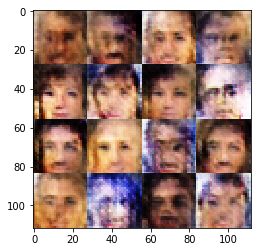

Epoch 1/1... Discriminator Loss: 1.3653 Generator Loss: 0.6222
Epoch 1/1... Discriminator Loss: 1.4717 Generator Loss: 0.5946
Epoch 1/1... Discriminator Loss: 1.4824 Generator Loss: 1.1285
Epoch 1/1... Discriminator Loss: 1.7812 Generator Loss: 0.6120
Epoch 1/1... Discriminator Loss: 1.5078 Generator Loss: 0.7503
Epoch 1/1... Discriminator Loss: 1.5463 Generator Loss: 0.8335
Epoch 1/1... Discriminator Loss: 1.5986 Generator Loss: 0.7096
Epoch 1/1... Discriminator Loss: 1.5679 Generator Loss: 0.6636
Epoch 1/1... Discriminator Loss: 1.3579 Generator Loss: 1.2329
Epoch 1/1... Discriminator Loss: 1.7220 Generator Loss: 1.0180


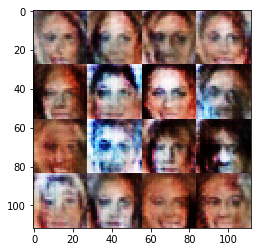

Epoch 1/1... Discriminator Loss: 1.7965 Generator Loss: 0.4108
Epoch 1/1... Discriminator Loss: 1.5560 Generator Loss: 0.9198
Epoch 1/1... Discriminator Loss: 1.4836 Generator Loss: 0.5307
Epoch 1/1... Discriminator Loss: 1.3208 Generator Loss: 0.9886
Epoch 1/1... Discriminator Loss: 1.6923 Generator Loss: 0.7410
Epoch 1/1... Discriminator Loss: 1.6501 Generator Loss: 0.9870
Epoch 1/1... Discriminator Loss: 1.5105 Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 1.7223 Generator Loss: 1.0257
Epoch 1/1... Discriminator Loss: 1.3728 Generator Loss: 0.8203
Epoch 1/1... Discriminator Loss: 1.5297 Generator Loss: 0.8508


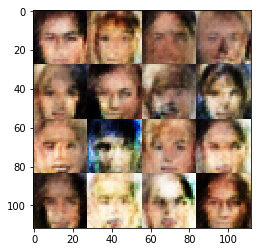

Epoch 1/1... Discriminator Loss: 1.2886 Generator Loss: 0.7861
Epoch 1/1... Discriminator Loss: 1.2528 Generator Loss: 0.6501
Epoch 1/1... Discriminator Loss: 1.6220 Generator Loss: 0.9174
Epoch 1/1... Discriminator Loss: 1.2255 Generator Loss: 0.9781
Epoch 1/1... Discriminator Loss: 1.4317 Generator Loss: 1.5850
Epoch 1/1... Discriminator Loss: 1.3697 Generator Loss: 1.0890
Epoch 1/1... Discriminator Loss: 1.4346 Generator Loss: 1.2872
Epoch 1/1... Discriminator Loss: 1.3827 Generator Loss: 0.8831
Epoch 1/1... Discriminator Loss: 1.5823 Generator Loss: 0.4961
Epoch 1/1... Discriminator Loss: 1.7943 Generator Loss: 0.5925


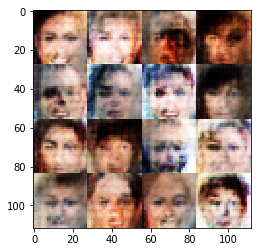

Epoch 1/1... Discriminator Loss: 1.4433 Generator Loss: 0.8278
Epoch 1/1... Discriminator Loss: 1.2770 Generator Loss: 1.1783
Epoch 1/1... Discriminator Loss: 1.3416 Generator Loss: 1.1692
Epoch 1/1... Discriminator Loss: 1.3786 Generator Loss: 0.7319
Epoch 1/1... Discriminator Loss: 1.4186 Generator Loss: 0.5108
Epoch 1/1... Discriminator Loss: 1.3953 Generator Loss: 0.7054
Epoch 1/1... Discriminator Loss: 1.6776 Generator Loss: 0.5222
Epoch 1/1... Discriminator Loss: 1.7145 Generator Loss: 0.3200
Epoch 1/1... Discriminator Loss: 1.9946 Generator Loss: 0.5322
Epoch 1/1... Discriminator Loss: 1.6501 Generator Loss: 0.8018


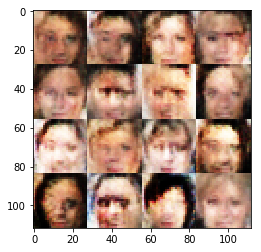

Epoch 1/1... Discriminator Loss: 1.6653 Generator Loss: 0.6621
Epoch 1/1... Discriminator Loss: 1.5400 Generator Loss: 0.6893
Epoch 1/1... Discriminator Loss: 1.3260 Generator Loss: 1.1076
Epoch 1/1... Discriminator Loss: 1.5485 Generator Loss: 0.6477
Epoch 1/1... Discriminator Loss: 1.6559 Generator Loss: 0.5590
Epoch 1/1... Discriminator Loss: 1.6155 Generator Loss: 0.7287
Epoch 1/1... Discriminator Loss: 1.7767 Generator Loss: 0.4580
Epoch 1/1... Discriminator Loss: 1.5715 Generator Loss: 0.7669
Epoch 1/1... Discriminator Loss: 1.5906 Generator Loss: 0.5743
Epoch 1/1... Discriminator Loss: 1.1964 Generator Loss: 0.8820


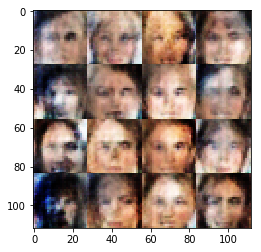

Epoch 1/1... Discriminator Loss: 1.4049 Generator Loss: 0.6227
Epoch 1/1... Discriminator Loss: 1.1375 Generator Loss: 1.2198
Epoch 1/1... Discriminator Loss: 1.1600 Generator Loss: 0.7134
Epoch 1/1... Discriminator Loss: 1.5000 Generator Loss: 0.4849
Epoch 1/1... Discriminator Loss: 1.3746 Generator Loss: 0.7607
Epoch 1/1... Discriminator Loss: 1.7928 Generator Loss: 1.2624
Epoch 1/1... Discriminator Loss: 1.5656 Generator Loss: 0.7615
Epoch 1/1... Discriminator Loss: 1.5133 Generator Loss: 0.5940
Epoch 1/1... Discriminator Loss: 1.5544 Generator Loss: 0.7475
Epoch 1/1... Discriminator Loss: 1.7305 Generator Loss: 0.5245


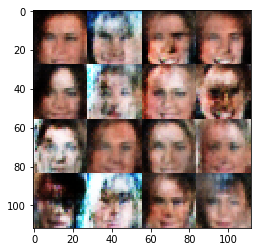

Epoch 1/1... Discriminator Loss: 1.3994 Generator Loss: 0.6362
Epoch 1/1... Discriminator Loss: 1.9398 Generator Loss: 0.3951
Epoch 1/1... Discriminator Loss: 1.9144 Generator Loss: 0.9322
Epoch 1/1... Discriminator Loss: 1.4460 Generator Loss: 1.0543
Epoch 1/1... Discriminator Loss: 1.7125 Generator Loss: 0.4842
Epoch 1/1... Discriminator Loss: 1.4164 Generator Loss: 0.6903
Epoch 1/1... Discriminator Loss: 1.5600 Generator Loss: 0.5945
Epoch 1/1... Discriminator Loss: 1.4719 Generator Loss: 1.0342
Epoch 1/1... Discriminator Loss: 1.1988 Generator Loss: 1.0006
Epoch 1/1... Discriminator Loss: 1.5354 Generator Loss: 0.6379


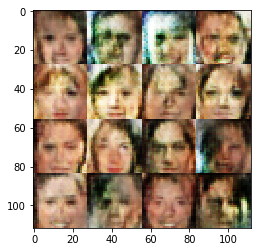

Epoch 1/1... Discriminator Loss: 1.3887 Generator Loss: 1.0019
Epoch 1/1... Discriminator Loss: 2.0865 Generator Loss: 0.2862
Epoch 1/1... Discriminator Loss: 1.2447 Generator Loss: 0.8043
Epoch 1/1... Discriminator Loss: 1.2351 Generator Loss: 1.2001
Epoch 1/1... Discriminator Loss: 1.6654 Generator Loss: 0.6228
Epoch 1/1... Discriminator Loss: 1.5260 Generator Loss: 0.9284
Epoch 1/1... Discriminator Loss: 1.8480 Generator Loss: 0.6631
Epoch 1/1... Discriminator Loss: 1.5552 Generator Loss: 0.5631
Epoch 1/1... Discriminator Loss: 1.4565 Generator Loss: 0.7247
Epoch 1/1... Discriminator Loss: 1.3388 Generator Loss: 0.7206


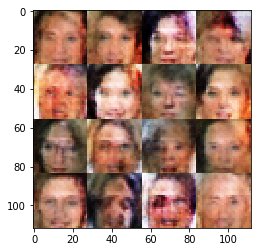

Epoch 1/1... Discriminator Loss: 1.1946 Generator Loss: 0.8690
Epoch 1/1... Discriminator Loss: 1.5449 Generator Loss: 0.6357
Epoch 1/1... Discriminator Loss: 1.4325 Generator Loss: 1.2392
Epoch 1/1... Discriminator Loss: 1.4326 Generator Loss: 0.8039
Epoch 1/1... Discriminator Loss: 1.4863 Generator Loss: 0.6417
Epoch 1/1... Discriminator Loss: 1.5174 Generator Loss: 0.9551
Epoch 1/1... Discriminator Loss: 1.5432 Generator Loss: 0.5503
Epoch 1/1... Discriminator Loss: 1.8531 Generator Loss: 0.4864
Epoch 1/1... Discriminator Loss: 1.2994 Generator Loss: 0.8733
Epoch 1/1... Discriminator Loss: 1.7210 Generator Loss: 0.7625


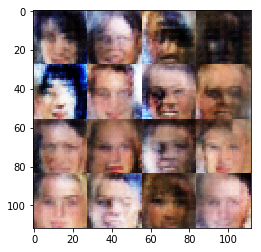

Epoch 1/1... Discriminator Loss: 1.6175 Generator Loss: 1.5793
Epoch 1/1... Discriminator Loss: 1.7936 Generator Loss: 0.3464
Epoch 1/1... Discriminator Loss: 1.4829 Generator Loss: 0.6324
Epoch 1/1... Discriminator Loss: 1.3658 Generator Loss: 0.8164
Epoch 1/1... Discriminator Loss: 1.5564 Generator Loss: 0.9528
Epoch 1/1... Discriminator Loss: 1.2153 Generator Loss: 0.8832
Epoch 1/1... Discriminator Loss: 1.5965 Generator Loss: 0.8462
Epoch 1/1... Discriminator Loss: 1.5335 Generator Loss: 0.5808
Epoch 1/1... Discriminator Loss: 1.6321 Generator Loss: 0.6764
Epoch 1/1... Discriminator Loss: 1.6793 Generator Loss: 1.0095


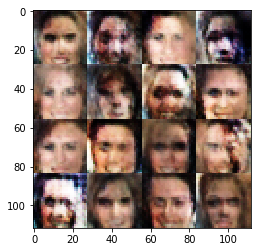

Epoch 1/1... Discriminator Loss: 1.6090 Generator Loss: 0.7165
Epoch 1/1... Discriminator Loss: 1.6971 Generator Loss: 1.2439
Epoch 1/1... Discriminator Loss: 1.6542 Generator Loss: 0.5368
Epoch 1/1... Discriminator Loss: 1.4956 Generator Loss: 0.9490
Epoch 1/1... Discriminator Loss: 1.4677 Generator Loss: 0.8866
Epoch 1/1... Discriminator Loss: 1.4821 Generator Loss: 0.4005
Epoch 1/1... Discriminator Loss: 1.5601 Generator Loss: 0.9276
Epoch 1/1... Discriminator Loss: 1.2968 Generator Loss: 1.2639
Epoch 1/1... Discriminator Loss: 1.5803 Generator Loss: 0.8444
Epoch 1/1... Discriminator Loss: 1.3231 Generator Loss: 0.7931


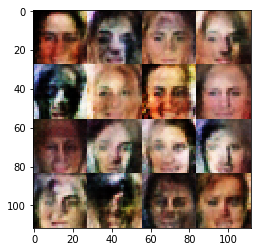

Epoch 1/1... Discriminator Loss: 1.5849 Generator Loss: 1.1030
Epoch 1/1... Discriminator Loss: 1.5588 Generator Loss: 0.5044
Epoch 1/1... Discriminator Loss: 1.4143 Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.4631 Generator Loss: 1.0483
Epoch 1/1... Discriminator Loss: 1.5380 Generator Loss: 0.8840
Epoch 1/1... Discriminator Loss: 1.3376 Generator Loss: 0.8814
Epoch 1/1... Discriminator Loss: 1.4380 Generator Loss: 0.5535
Epoch 1/1... Discriminator Loss: 1.6097 Generator Loss: 0.5966
Epoch 1/1... Discriminator Loss: 1.6675 Generator Loss: 0.5572
Epoch 1/1... Discriminator Loss: 1.5884 Generator Loss: 0.9859


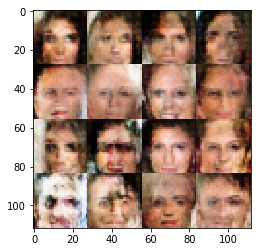

Epoch 1/1... Discriminator Loss: 1.4105 Generator Loss: 0.7832
Epoch 1/1... Discriminator Loss: 1.7420 Generator Loss: 1.0177
Epoch 1/1... Discriminator Loss: 1.7282 Generator Loss: 0.7268
Epoch 1/1... Discriminator Loss: 1.5445 Generator Loss: 0.7464
Epoch 1/1... Discriminator Loss: 1.5420 Generator Loss: 0.8818
Epoch 1/1... Discriminator Loss: 1.6704 Generator Loss: 0.5852
Epoch 1/1... Discriminator Loss: 1.3024 Generator Loss: 0.6977
Epoch 1/1... Discriminator Loss: 1.2408 Generator Loss: 0.7175
Epoch 1/1... Discriminator Loss: 1.5293 Generator Loss: 0.6870
Epoch 1/1... Discriminator Loss: 1.4876 Generator Loss: 0.5843


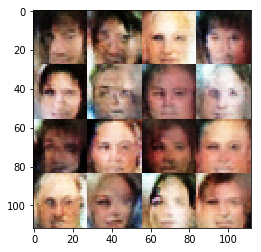

Epoch 1/1... Discriminator Loss: 1.2689 Generator Loss: 0.7645
Epoch 1/1... Discriminator Loss: 1.5359 Generator Loss: 0.7784
Epoch 1/1... Discriminator Loss: 1.4357 Generator Loss: 0.7132
Epoch 1/1... Discriminator Loss: 1.4522 Generator Loss: 0.8689
Epoch 1/1... Discriminator Loss: 1.4829 Generator Loss: 0.8953
Epoch 1/1... Discriminator Loss: 1.2988 Generator Loss: 0.9277
Epoch 1/1... Discriminator Loss: 1.4587 Generator Loss: 0.9800
Epoch 1/1... Discriminator Loss: 1.7339 Generator Loss: 0.4242
Epoch 1/1... Discriminator Loss: 1.5229 Generator Loss: 0.6917
Epoch 1/1... Discriminator Loss: 1.1414 Generator Loss: 0.9445


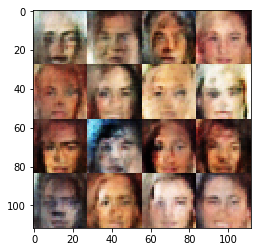

Epoch 1/1... Discriminator Loss: 1.3747 Generator Loss: 0.7421
Epoch 1/1... Discriminator Loss: 1.5178 Generator Loss: 0.9584
Epoch 1/1... Discriminator Loss: 1.6022 Generator Loss: 1.0476
Epoch 1/1... Discriminator Loss: 1.4850 Generator Loss: 0.7799
Epoch 1/1... Discriminator Loss: 1.4543 Generator Loss: 0.7813
Epoch 1/1... Discriminator Loss: 1.4546 Generator Loss: 0.8505
Epoch 1/1... Discriminator Loss: 1.4344 Generator Loss: 0.7254
Epoch 1/1... Discriminator Loss: 1.4402 Generator Loss: 0.7958
Epoch 1/1... Discriminator Loss: 1.3509 Generator Loss: 0.8337
Epoch 1/1... Discriminator Loss: 1.4812 Generator Loss: 0.5805


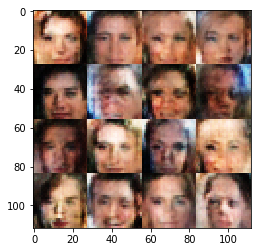

Epoch 1/1... Discriminator Loss: 1.4583 Generator Loss: 0.6599
Epoch 1/1... Discriminator Loss: 1.4987 Generator Loss: 0.6082
Epoch 1/1... Discriminator Loss: 1.5434 Generator Loss: 1.1250
Epoch 1/1... Discriminator Loss: 1.3254 Generator Loss: 0.8315
Epoch 1/1... Discriminator Loss: 1.2445 Generator Loss: 1.0358
Epoch 1/1... Discriminator Loss: 1.3067 Generator Loss: 0.6997
Epoch 1/1... Discriminator Loss: 1.4359 Generator Loss: 0.8016
Epoch 1/1... Discriminator Loss: 1.4466 Generator Loss: 0.7565
Epoch 1/1... Discriminator Loss: 1.5322 Generator Loss: 0.6483
Epoch 1/1... Discriminator Loss: 1.6018 Generator Loss: 0.8571


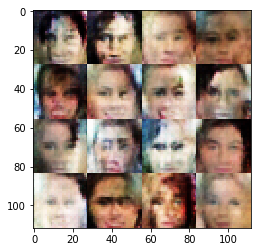

Epoch 1/1... Discriminator Loss: 1.3480 Generator Loss: 0.6900
Epoch 1/1... Discriminator Loss: 1.3846 Generator Loss: 0.6284
Epoch 1/1... Discriminator Loss: 1.3038 Generator Loss: 0.7150
Epoch 1/1... Discriminator Loss: 1.4704 Generator Loss: 0.7086
Epoch 1/1... Discriminator Loss: 1.5222 Generator Loss: 0.9247
Epoch 1/1... Discriminator Loss: 1.4655 Generator Loss: 0.8451
Epoch 1/1... Discriminator Loss: 1.3692 Generator Loss: 0.8816
Epoch 1/1... Discriminator Loss: 1.4667 Generator Loss: 0.9715
Epoch 1/1... Discriminator Loss: 1.6026 Generator Loss: 0.8560
Epoch 1/1... Discriminator Loss: 1.5092 Generator Loss: 0.7105


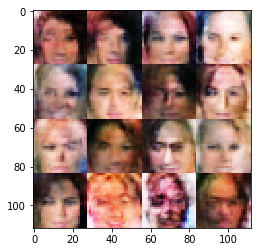

Epoch 1/1... Discriminator Loss: 1.4034 Generator Loss: 0.9018
Epoch 1/1... Discriminator Loss: 1.4302 Generator Loss: 0.6168
Epoch 1/1... Discriminator Loss: 1.2290 Generator Loss: 0.7179
Epoch 1/1... Discriminator Loss: 1.5920 Generator Loss: 1.0940
Epoch 1/1... Discriminator Loss: 1.3354 Generator Loss: 1.0055
Epoch 1/1... Discriminator Loss: 1.6724 Generator Loss: 0.5553
Epoch 1/1... Discriminator Loss: 1.4126 Generator Loss: 1.0532
Epoch 1/1... Discriminator Loss: 1.2984 Generator Loss: 0.8924
Epoch 1/1... Discriminator Loss: 1.6402 Generator Loss: 0.6347
Epoch 1/1... Discriminator Loss: 1.2874 Generator Loss: 0.6908


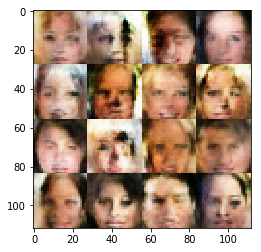

Epoch 1/1... Discriminator Loss: 1.8218 Generator Loss: 0.3504
Epoch 1/1... Discriminator Loss: 1.4166 Generator Loss: 0.6424
Epoch 1/1... Discriminator Loss: 1.3660 Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.2992 Generator Loss: 0.8358
Epoch 1/1... Discriminator Loss: 1.4218 Generator Loss: 1.0551
Epoch 1/1... Discriminator Loss: 1.5756 Generator Loss: 0.6230
Epoch 1/1... Discriminator Loss: 1.3931 Generator Loss: 1.1003
Epoch 1/1... Discriminator Loss: 1.4169 Generator Loss: 0.6343
Epoch 1/1... Discriminator Loss: 1.6821 Generator Loss: 0.3520
Epoch 1/1... Discriminator Loss: 1.5436 Generator Loss: 0.5946


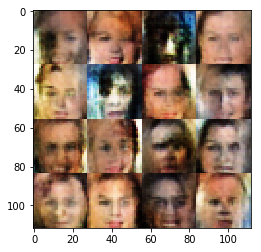

Epoch 1/1... Discriminator Loss: 1.5043 Generator Loss: 1.1462
Epoch 1/1... Discriminator Loss: 1.3149 Generator Loss: 0.8983
Epoch 1/1... Discriminator Loss: 1.5959 Generator Loss: 0.9298
Epoch 1/1... Discriminator Loss: 1.7364 Generator Loss: 0.8192
Epoch 1/1... Discriminator Loss: 1.3657 Generator Loss: 0.7796
Epoch 1/1... Discriminator Loss: 1.2644 Generator Loss: 0.7636
Epoch 1/1... Discriminator Loss: 1.5185 Generator Loss: 0.7616
Epoch 1/1... Discriminator Loss: 1.3137 Generator Loss: 0.7516
Epoch 1/1... Discriminator Loss: 1.4339 Generator Loss: 0.7168
Epoch 1/1... Discriminator Loss: 1.4561 Generator Loss: 0.8664


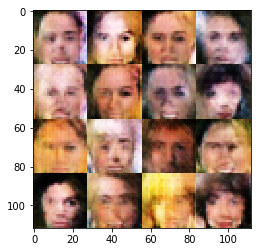

Epoch 1/1... Discriminator Loss: 1.2730 Generator Loss: 0.8170
Epoch 1/1... Discriminator Loss: 1.6154 Generator Loss: 0.5569
Epoch 1/1... Discriminator Loss: 1.3741 Generator Loss: 0.6994
Epoch 1/1... Discriminator Loss: 1.5253 Generator Loss: 0.7833
Epoch 1/1... Discriminator Loss: 1.5385 Generator Loss: 0.7378
Epoch 1/1... Discriminator Loss: 1.2797 Generator Loss: 1.0542
Epoch 1/1... Discriminator Loss: 1.5119 Generator Loss: 0.6470
Epoch 1/1... Discriminator Loss: 1.5211 Generator Loss: 0.8124
Epoch 1/1... Discriminator Loss: 1.2958 Generator Loss: 0.7437
Epoch 1/1... Discriminator Loss: 1.6559 Generator Loss: 0.6528


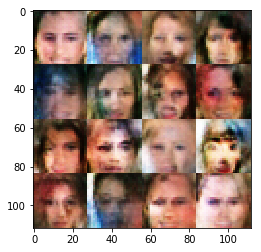

Epoch 1/1... Discriminator Loss: 1.3887 Generator Loss: 0.6545
Epoch 1/1... Discriminator Loss: 1.3708 Generator Loss: 0.9174
Epoch 1/1... Discriminator Loss: 1.3805 Generator Loss: 0.7563
Epoch 1/1... Discriminator Loss: 1.4145 Generator Loss: 0.6900
Epoch 1/1... Discriminator Loss: 1.8019 Generator Loss: 0.4959
Epoch 1/1... Discriminator Loss: 1.4886 Generator Loss: 0.5139
Epoch 1/1... Discriminator Loss: 1.2211 Generator Loss: 0.9707
Epoch 1/1... Discriminator Loss: 1.4617 Generator Loss: 0.6966
Epoch 1/1... Discriminator Loss: 1.6373 Generator Loss: 0.5758
Epoch 1/1... Discriminator Loss: 1.4609 Generator Loss: 0.8391


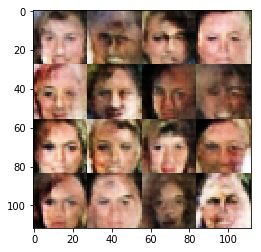

Epoch 1/1... Discriminator Loss: 1.2758 Generator Loss: 1.0803
Epoch 1/1... Discriminator Loss: 1.4335 Generator Loss: 0.8973
Epoch 1/1... Discriminator Loss: 1.3697 Generator Loss: 0.6875
Epoch 1/1... Discriminator Loss: 1.4387 Generator Loss: 0.7117
Epoch 1/1... Discriminator Loss: 1.6766 Generator Loss: 0.5899
Epoch 1/1... Discriminator Loss: 1.3752 Generator Loss: 0.8851
Epoch 1/1... Discriminator Loss: 1.2991 Generator Loss: 0.7544
Epoch 1/1... Discriminator Loss: 1.5913 Generator Loss: 1.0769
Epoch 1/1... Discriminator Loss: 1.2951 Generator Loss: 0.9930
Epoch 1/1... Discriminator Loss: 1.4717 Generator Loss: 0.9056


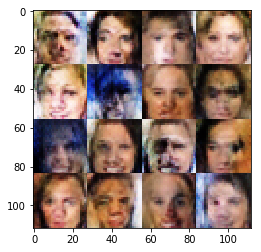

Epoch 1/1... Discriminator Loss: 1.7497 Generator Loss: 0.4800
Epoch 1/1... Discriminator Loss: 1.3919 Generator Loss: 0.7748
Epoch 1/1... Discriminator Loss: 1.4929 Generator Loss: 0.6911
Epoch 1/1... Discriminator Loss: 1.4321 Generator Loss: 0.5489
Epoch 1/1... Discriminator Loss: 1.3491 Generator Loss: 0.7288
Epoch 1/1... Discriminator Loss: 1.4262 Generator Loss: 0.6093
Epoch 1/1... Discriminator Loss: 1.5137 Generator Loss: 0.8697
Epoch 1/1... Discriminator Loss: 1.3550 Generator Loss: 0.7047
Epoch 1/1... Discriminator Loss: 1.2597 Generator Loss: 1.1340
Epoch 1/1... Discriminator Loss: 1.3995 Generator Loss: 0.7328


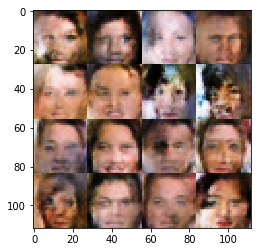

Epoch 1/1... Discriminator Loss: 1.8331 Generator Loss: 0.6824
Epoch 1/1... Discriminator Loss: 1.3922 Generator Loss: 0.9489
Epoch 1/1... Discriminator Loss: 1.4669 Generator Loss: 0.8334
Epoch 1/1... Discriminator Loss: 1.3592 Generator Loss: 0.7809
Epoch 1/1... Discriminator Loss: 1.1767 Generator Loss: 0.7845
Epoch 1/1... Discriminator Loss: 1.7291 Generator Loss: 0.5897
Epoch 1/1... Discriminator Loss: 1.7330 Generator Loss: 0.5073
Epoch 1/1... Discriminator Loss: 1.4113 Generator Loss: 0.6238
Epoch 1/1... Discriminator Loss: 1.3182 Generator Loss: 0.8887
Epoch 1/1... Discriminator Loss: 1.3275 Generator Loss: 0.8785


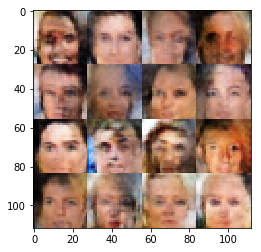

Epoch 1/1... Discriminator Loss: 1.4604 Generator Loss: 0.8091
Epoch 1/1... Discriminator Loss: 1.6390 Generator Loss: 0.5978
Epoch 1/1... Discriminator Loss: 1.3865 Generator Loss: 0.9164
Epoch 1/1... Discriminator Loss: 1.4530 Generator Loss: 0.8257
Epoch 1/1... Discriminator Loss: 1.4598 Generator Loss: 0.6865
Epoch 1/1... Discriminator Loss: 1.1426 Generator Loss: 1.0881
Epoch 1/1... Discriminator Loss: 1.2928 Generator Loss: 0.9037
Epoch 1/1... Discriminator Loss: 1.5927 Generator Loss: 0.8190
Epoch 1/1... Discriminator Loss: 1.4085 Generator Loss: 0.7224
Epoch 1/1... Discriminator Loss: 1.5496 Generator Loss: 0.7940


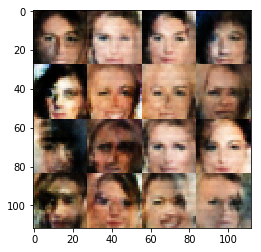

Epoch 1/1... Discriminator Loss: 1.4987 Generator Loss: 0.7776
Epoch 1/1... Discriminator Loss: 1.2247 Generator Loss: 1.3789
Epoch 1/1... Discriminator Loss: 1.2926 Generator Loss: 0.7358
Epoch 1/1... Discriminator Loss: 1.3977 Generator Loss: 0.7378
Epoch 1/1... Discriminator Loss: 1.5052 Generator Loss: 0.6826
Epoch 1/1... Discriminator Loss: 1.6033 Generator Loss: 0.6711
Epoch 1/1... Discriminator Loss: 1.1750 Generator Loss: 0.9656
Epoch 1/1... Discriminator Loss: 1.6618 Generator Loss: 0.6039
Epoch 1/1... Discriminator Loss: 1.4917 Generator Loss: 1.1225
Epoch 1/1... Discriminator Loss: 1.4281 Generator Loss: 0.6586


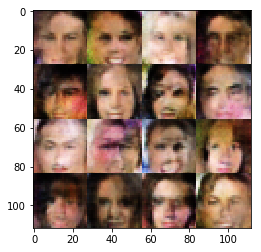

Epoch 1/1... Discriminator Loss: 1.4443 Generator Loss: 0.9177
Epoch 1/1... Discriminator Loss: 1.4642 Generator Loss: 0.7728
Epoch 1/1... Discriminator Loss: 1.4819 Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.3137 Generator Loss: 0.7810
Epoch 1/1... Discriminator Loss: 1.3886 Generator Loss: 1.0138
Epoch 1/1... Discriminator Loss: 1.5682 Generator Loss: 0.5422
Epoch 1/1... Discriminator Loss: 1.2432 Generator Loss: 0.7605
Epoch 1/1... Discriminator Loss: 1.4362 Generator Loss: 0.6556
Epoch 1/1... Discriminator Loss: 1.7024 Generator Loss: 0.5025
Epoch 1/1... Discriminator Loss: 1.3739 Generator Loss: 0.6844


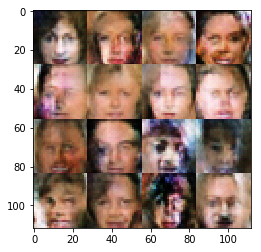

Epoch 1/1... Discriminator Loss: 1.6612 Generator Loss: 0.5931
Epoch 1/1... Discriminator Loss: 1.2959 Generator Loss: 0.9044
Epoch 1/1... Discriminator Loss: 1.4549 Generator Loss: 0.7835
Epoch 1/1... Discriminator Loss: 1.5513 Generator Loss: 0.6135
Epoch 1/1... Discriminator Loss: 1.2788 Generator Loss: 0.9169
Epoch 1/1... Discriminator Loss: 1.4264 Generator Loss: 0.5687
Epoch 1/1... Discriminator Loss: 1.5174 Generator Loss: 0.9033
Epoch 1/1... Discriminator Loss: 1.4856 Generator Loss: 0.6477
Epoch 1/1... Discriminator Loss: 1.4656 Generator Loss: 0.7006
Epoch 1/1... Discriminator Loss: 1.4624 Generator Loss: 0.9679


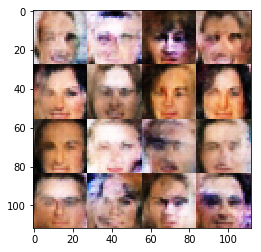

Epoch 1/1... Discriminator Loss: 1.2379 Generator Loss: 0.9893
Epoch 1/1... Discriminator Loss: 1.3300 Generator Loss: 0.7062
Epoch 1/1... Discriminator Loss: 1.4432 Generator Loss: 0.7655
Epoch 1/1... Discriminator Loss: 1.2982 Generator Loss: 0.9123
Epoch 1/1... Discriminator Loss: 1.2514 Generator Loss: 0.9059
Epoch 1/1... Discriminator Loss: 1.4467 Generator Loss: 0.6369
Epoch 1/1... Discriminator Loss: 1.5006 Generator Loss: 0.8394
Epoch 1/1... Discriminator Loss: 1.4616 Generator Loss: 0.6316
Epoch 1/1... Discriminator Loss: 1.5346 Generator Loss: 1.0368
Epoch 1/1... Discriminator Loss: 1.4987 Generator Loss: 0.5915


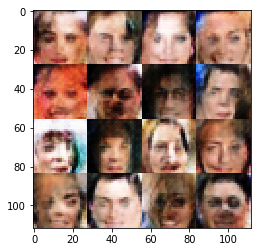

Epoch 1/1... Discriminator Loss: 1.3013 Generator Loss: 0.7288
Epoch 1/1... Discriminator Loss: 1.3540 Generator Loss: 1.0196
Epoch 1/1... Discriminator Loss: 1.3585 Generator Loss: 0.9323
Epoch 1/1... Discriminator Loss: 1.2643 Generator Loss: 0.7835
Epoch 1/1... Discriminator Loss: 1.5729 Generator Loss: 0.5545
Epoch 1/1... Discriminator Loss: 1.6550 Generator Loss: 0.7727
Epoch 1/1... Discriminator Loss: 1.5502 Generator Loss: 0.7340
Epoch 1/1... Discriminator Loss: 1.3482 Generator Loss: 0.7264
Epoch 1/1... Discriminator Loss: 1.4206 Generator Loss: 0.5310
Epoch 1/1... Discriminator Loss: 1.2172 Generator Loss: 0.8233


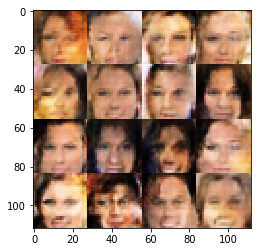

Epoch 1/1... Discriminator Loss: 1.3188 Generator Loss: 0.8000
Epoch 1/1... Discriminator Loss: 1.4032 Generator Loss: 0.7687
Epoch 1/1... Discriminator Loss: 1.4464 Generator Loss: 1.0333
Epoch 1/1... Discriminator Loss: 1.5718 Generator Loss: 0.5606
Epoch 1/1... Discriminator Loss: 1.2873 Generator Loss: 0.8504
Epoch 1/1... Discriminator Loss: 1.4993 Generator Loss: 0.8148
Epoch 1/1... Discriminator Loss: 1.3150 Generator Loss: 0.7328
Epoch 1/1... Discriminator Loss: 1.3964 Generator Loss: 1.0361
Epoch 1/1... Discriminator Loss: 1.3062 Generator Loss: 0.7469
Epoch 1/1... Discriminator Loss: 1.4023 Generator Loss: 0.8671


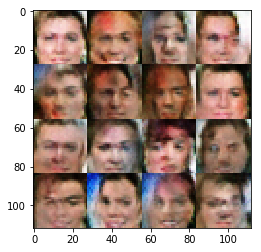

Epoch 1/1... Discriminator Loss: 1.5107 Generator Loss: 0.8591
Epoch 1/1... Discriminator Loss: 1.5688 Generator Loss: 0.6932
Epoch 1/1... Discriminator Loss: 1.4814 Generator Loss: 0.5436
Epoch 1/1... Discriminator Loss: 1.3339 Generator Loss: 0.9227
Epoch 1/1... Discriminator Loss: 1.3289 Generator Loss: 0.9280
Epoch 1/1... Discriminator Loss: 1.6108 Generator Loss: 0.9967
Epoch 1/1... Discriminator Loss: 1.1625 Generator Loss: 1.1946
Epoch 1/1... Discriminator Loss: 1.5762 Generator Loss: 0.7820
Epoch 1/1... Discriminator Loss: 1.4886 Generator Loss: 0.8830
Epoch 1/1... Discriminator Loss: 1.1416 Generator Loss: 0.9846


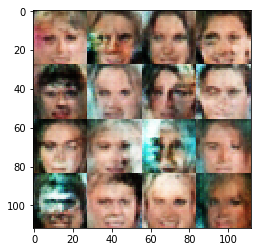

Epoch 1/1... Discriminator Loss: 1.4921 Generator Loss: 0.8217
Epoch 1/1... Discriminator Loss: 1.4251 Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 1.1774 Generator Loss: 0.9182
Epoch 1/1... Discriminator Loss: 1.5002 Generator Loss: 0.6181
Epoch 1/1... Discriminator Loss: 1.4718 Generator Loss: 0.7661
Epoch 1/1... Discriminator Loss: 1.4361 Generator Loss: 0.7750
Epoch 1/1... Discriminator Loss: 1.5392 Generator Loss: 0.5841
Epoch 1/1... Discriminator Loss: 1.2215 Generator Loss: 0.9151
Epoch 1/1... Discriminator Loss: 1.5697 Generator Loss: 0.5705
Epoch 1/1... Discriminator Loss: 1.5637 Generator Loss: 0.5809


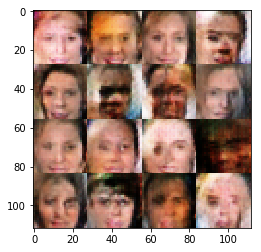

Epoch 1/1... Discriminator Loss: 1.4177 Generator Loss: 0.6247
Epoch 1/1... Discriminator Loss: 1.4538 Generator Loss: 0.6972
Epoch 1/1... Discriminator Loss: 1.5613 Generator Loss: 0.6218
Epoch 1/1... Discriminator Loss: 1.3289 Generator Loss: 0.7600
Epoch 1/1... Discriminator Loss: 1.2657 Generator Loss: 0.9090
Epoch 1/1... Discriminator Loss: 1.4483 Generator Loss: 0.6933
Epoch 1/1... Discriminator Loss: 1.2756 Generator Loss: 0.9493
Epoch 1/1... Discriminator Loss: 1.4013 Generator Loss: 1.0586
Epoch 1/1... Discriminator Loss: 1.4817 Generator Loss: 0.7242
Epoch 1/1... Discriminator Loss: 1.3486 Generator Loss: 0.6599


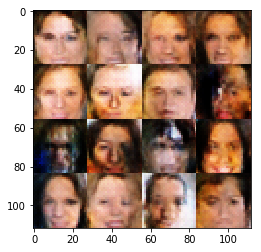

Epoch 1/1... Discriminator Loss: 1.5473 Generator Loss: 0.5741
Epoch 1/1... Discriminator Loss: 1.3448 Generator Loss: 0.9027
Epoch 1/1... Discriminator Loss: 1.2948 Generator Loss: 0.8380
Epoch 1/1... Discriminator Loss: 1.5219 Generator Loss: 0.5776
Epoch 1/1... Discriminator Loss: 1.4235 Generator Loss: 0.7334
Epoch 1/1... Discriminator Loss: 1.5441 Generator Loss: 0.7194
Epoch 1/1... Discriminator Loss: 1.5813 Generator Loss: 0.7147
Epoch 1/1... Discriminator Loss: 1.4945 Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.4687 Generator Loss: 0.6111
Epoch 1/1... Discriminator Loss: 1.4517 Generator Loss: 0.6596


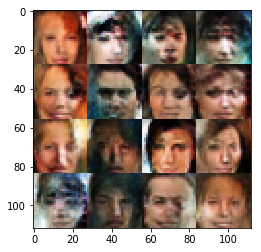

Epoch 1/1... Discriminator Loss: 1.5350 Generator Loss: 0.5956
Epoch 1/1... Discriminator Loss: 1.5491 Generator Loss: 0.6562
Epoch 1/1... Discriminator Loss: 1.3196 Generator Loss: 0.8656
Epoch 1/1... Discriminator Loss: 1.3795 Generator Loss: 0.8306
Epoch 1/1... Discriminator Loss: 1.4148 Generator Loss: 0.7221
Epoch 1/1... Discriminator Loss: 1.5822 Generator Loss: 0.6657
Epoch 1/1... Discriminator Loss: 1.4816 Generator Loss: 0.7966
Epoch 1/1... Discriminator Loss: 1.3222 Generator Loss: 0.7705
Epoch 1/1... Discriminator Loss: 1.3700 Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 1.1740 Generator Loss: 0.9660


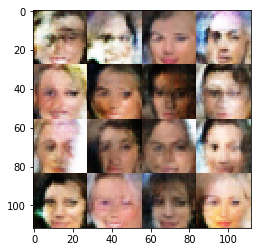

Epoch 1/1... Discriminator Loss: 1.4797 Generator Loss: 0.7522
Epoch 1/1... Discriminator Loss: 1.5429 Generator Loss: 0.6882
Epoch 1/1... Discriminator Loss: 1.3362 Generator Loss: 1.0429
Epoch 1/1... Discriminator Loss: 1.3268 Generator Loss: 0.8833
Epoch 1/1... Discriminator Loss: 1.6112 Generator Loss: 0.7381
Epoch 1/1... Discriminator Loss: 1.5383 Generator Loss: 0.6383
Epoch 1/1... Discriminator Loss: 1.4835 Generator Loss: 0.7953
Epoch 1/1... Discriminator Loss: 1.4143 Generator Loss: 0.7834
Epoch 1/1... Discriminator Loss: 1.5171 Generator Loss: 0.6646
Epoch 1/1... Discriminator Loss: 1.4746 Generator Loss: 0.6630


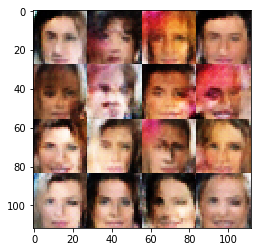

Epoch 1/1... Discriminator Loss: 1.3949 Generator Loss: 0.6912
Epoch 1/1... Discriminator Loss: 1.5825 Generator Loss: 0.5989
Epoch 1/1... Discriminator Loss: 1.2770 Generator Loss: 0.9326
Epoch 1/1... Discriminator Loss: 1.4593 Generator Loss: 0.8305
Epoch 1/1... Discriminator Loss: 1.2452 Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 1.3587 Generator Loss: 0.8059
Epoch 1/1... Discriminator Loss: 1.3910 Generator Loss: 0.7033
Epoch 1/1... Discriminator Loss: 1.3916 Generator Loss: 0.7735
Epoch 1/1... Discriminator Loss: 1.4249 Generator Loss: 0.7166
Epoch 1/1... Discriminator Loss: 1.4701 Generator Loss: 0.7557


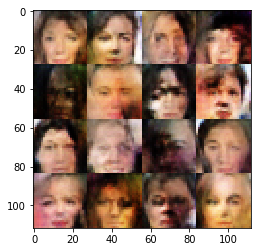

Epoch 1/1... Discriminator Loss: 1.4297 Generator Loss: 0.9118
Epoch 1/1... Discriminator Loss: 1.4172 Generator Loss: 0.8089
Epoch 1/1... Discriminator Loss: 1.5724 Generator Loss: 0.6594
Epoch 1/1... Discriminator Loss: 1.5236 Generator Loss: 0.6731
Epoch 1/1... Discriminator Loss: 1.3712 Generator Loss: 0.8235
Epoch 1/1... Discriminator Loss: 1.3805 Generator Loss: 0.7605
Epoch 1/1... Discriminator Loss: 1.4534 Generator Loss: 0.6159
Epoch 1/1... Discriminator Loss: 1.4061 Generator Loss: 0.6889
Epoch 1/1... Discriminator Loss: 1.3782 Generator Loss: 0.8238
Epoch 1/1... Discriminator Loss: 1.3949 Generator Loss: 1.0118


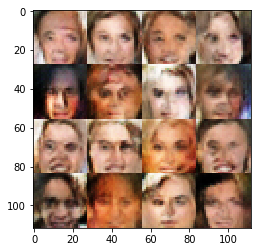

Epoch 1/1... Discriminator Loss: 1.6889 Generator Loss: 0.6999
Epoch 1/1... Discriminator Loss: 1.4891 Generator Loss: 0.7512
Epoch 1/1... Discriminator Loss: 1.4033 Generator Loss: 0.9374
Epoch 1/1... Discriminator Loss: 1.3625 Generator Loss: 0.8166
Epoch 1/1... Discriminator Loss: 1.6038 Generator Loss: 0.8488
Epoch 1/1... Discriminator Loss: 1.4520 Generator Loss: 0.6901
Epoch 1/1... Discriminator Loss: 1.4400 Generator Loss: 0.8282
Epoch 1/1... Discriminator Loss: 1.5736 Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.3320 Generator Loss: 0.7373
Epoch 1/1... Discriminator Loss: 1.3653 Generator Loss: 0.8231


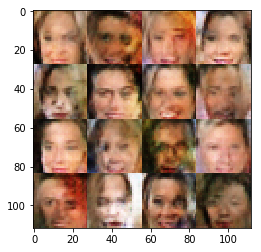

Epoch 1/1... Discriminator Loss: 1.5155 Generator Loss: 0.6265
Epoch 1/1... Discriminator Loss: 1.4609 Generator Loss: 1.1458
Epoch 1/1... Discriminator Loss: 1.3931 Generator Loss: 0.8371
Epoch 1/1... Discriminator Loss: 1.5404 Generator Loss: 0.9876
Epoch 1/1... Discriminator Loss: 1.4146 Generator Loss: 0.7953
Epoch 1/1... Discriminator Loss: 1.3519 Generator Loss: 0.7470
Epoch 1/1... Discriminator Loss: 1.4689 Generator Loss: 0.7741
Epoch 1/1... Discriminator Loss: 1.4907 Generator Loss: 0.6519
Epoch 1/1... Discriminator Loss: 1.5617 Generator Loss: 0.6558
Epoch 1/1... Discriminator Loss: 1.4623 Generator Loss: 0.7056


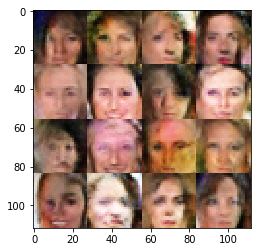

Epoch 1/1... Discriminator Loss: 1.3970 Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 1.5146 Generator Loss: 0.6738
Epoch 1/1... Discriminator Loss: 1.4483 Generator Loss: 0.6582
Epoch 1/1... Discriminator Loss: 1.5038 Generator Loss: 0.6466
Epoch 1/1... Discriminator Loss: 1.3239 Generator Loss: 0.7343
Epoch 1/1... Discriminator Loss: 1.3832 Generator Loss: 0.8320
Epoch 1/1... Discriminator Loss: 1.5265 Generator Loss: 0.7671
Epoch 1/1... Discriminator Loss: 1.2353 Generator Loss: 0.7723
Epoch 1/1... Discriminator Loss: 1.4090 Generator Loss: 0.7270
Epoch 1/1... Discriminator Loss: 1.3782 Generator Loss: 0.9629


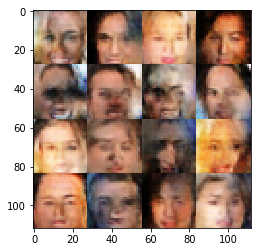

Epoch 1/1... Discriminator Loss: 1.5677 Generator Loss: 0.5462
Epoch 1/1... Discriminator Loss: 1.4730 Generator Loss: 0.6732
Epoch 1/1... Discriminator Loss: 1.4863 Generator Loss: 0.8087
Epoch 1/1... Discriminator Loss: 1.3958 Generator Loss: 0.7072
Epoch 1/1... Discriminator Loss: 1.4912 Generator Loss: 0.7012
Epoch 1/1... Discriminator Loss: 1.3711 Generator Loss: 0.6942
Epoch 1/1... Discriminator Loss: 1.3744 Generator Loss: 0.6791
Epoch 1/1... Discriminator Loss: 1.4212 Generator Loss: 0.7420
Epoch 1/1... Discriminator Loss: 1.4495 Generator Loss: 0.7818
Epoch 1/1... Discriminator Loss: 1.3474 Generator Loss: 0.8382


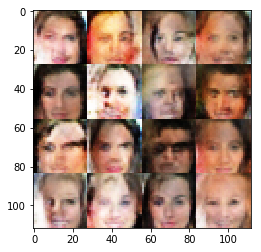

Epoch 1/1... Discriminator Loss: 1.3838 Generator Loss: 0.7083
Epoch 1/1... Discriminator Loss: 1.3918 Generator Loss: 0.9885
Epoch 1/1... Discriminator Loss: 1.5196 Generator Loss: 0.6147
Epoch 1/1... Discriminator Loss: 1.4465 Generator Loss: 0.6369
Epoch 1/1... Discriminator Loss: 1.3584 Generator Loss: 0.7218
Epoch 1/1... Discriminator Loss: 1.4736 Generator Loss: 0.7190
Epoch 1/1... Discriminator Loss: 1.5173 Generator Loss: 0.6514
Epoch 1/1... Discriminator Loss: 1.4077 Generator Loss: 0.7601
Epoch 1/1... Discriminator Loss: 1.3326 Generator Loss: 0.7840
Epoch 1/1... Discriminator Loss: 1.3801 Generator Loss: 0.8877


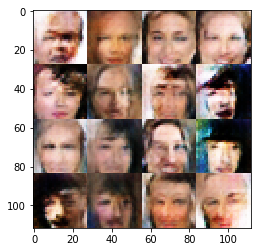

Epoch 1/1... Discriminator Loss: 1.5514 Generator Loss: 0.7608
Epoch 1/1... Discriminator Loss: 1.4399 Generator Loss: 0.7464
Epoch 1/1... Discriminator Loss: 1.3630 Generator Loss: 0.7109
Epoch 1/1... Discriminator Loss: 1.5021 Generator Loss: 0.8872
Epoch 1/1... Discriminator Loss: 1.3115 Generator Loss: 0.7104
Epoch 1/1... Discriminator Loss: 1.3508 Generator Loss: 0.7092
Epoch 1/1... Discriminator Loss: 1.4990 Generator Loss: 0.7364
Epoch 1/1... Discriminator Loss: 1.4618 Generator Loss: 0.6686
Epoch 1/1... Discriminator Loss: 1.3792 Generator Loss: 0.7105
Epoch 1/1... Discriminator Loss: 1.3492 Generator Loss: 0.7789


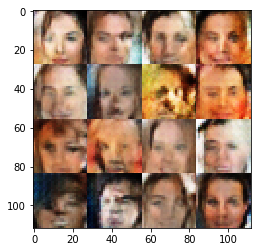

Epoch 1/1... Discriminator Loss: 1.4753 Generator Loss: 0.6763
Epoch 1/1... Discriminator Loss: 1.4419 Generator Loss: 0.8442
Epoch 1/1... Discriminator Loss: 1.3713 Generator Loss: 0.7717
Epoch 1/1... Discriminator Loss: 1.3297 Generator Loss: 0.8929
Epoch 1/1... Discriminator Loss: 1.3543 Generator Loss: 0.8394
Epoch 1/1... Discriminator Loss: 1.2474 Generator Loss: 0.9240
Epoch 1/1... Discriminator Loss: 1.4239 Generator Loss: 0.8646
Epoch 1/1... Discriminator Loss: 1.4003 Generator Loss: 0.7424
Epoch 1/1... Discriminator Loss: 1.4173 Generator Loss: 0.6224
Epoch 1/1... Discriminator Loss: 1.3587 Generator Loss: 0.7189


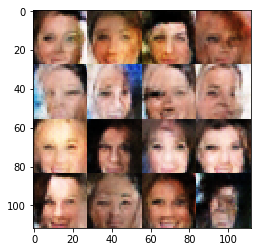

Epoch 1/1... Discriminator Loss: 1.4143 Generator Loss: 0.7033
Epoch 1/1... Discriminator Loss: 1.3929 Generator Loss: 0.8794
Epoch 1/1... Discriminator Loss: 1.3441 Generator Loss: 0.8288
Epoch 1/1... Discriminator Loss: 1.4440 Generator Loss: 0.7066
Epoch 1/1... Discriminator Loss: 1.4083 Generator Loss: 0.6543
Epoch 1/1... Discriminator Loss: 1.4306 Generator Loss: 0.6863
Epoch 1/1... Discriminator Loss: 1.3376 Generator Loss: 0.6328
Epoch 1/1... Discriminator Loss: 1.5289 Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.4056 Generator Loss: 0.7710
Epoch 1/1... Discriminator Loss: 1.3761 Generator Loss: 0.7531


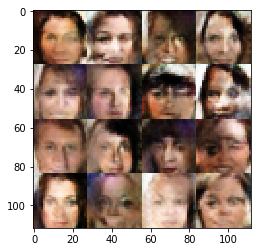

Epoch 1/1... Discriminator Loss: 1.2948 Generator Loss: 0.7470
Epoch 1/1... Discriminator Loss: 1.5658 Generator Loss: 0.6280
Epoch 1/1... Discriminator Loss: 1.4104 Generator Loss: 0.8213
Epoch 1/1... Discriminator Loss: 1.5426 Generator Loss: 0.8836
Epoch 1/1... Discriminator Loss: 1.3544 Generator Loss: 0.7213
Epoch 1/1... Discriminator Loss: 1.6400 Generator Loss: 0.7605
Epoch 1/1... Discriminator Loss: 1.3700 Generator Loss: 0.9700
Epoch 1/1... Discriminator Loss: 1.5221 Generator Loss: 0.6413
Epoch 1/1... Discriminator Loss: 1.2629 Generator Loss: 1.0866
Epoch 1/1... Discriminator Loss: 1.3069 Generator Loss: 0.7750


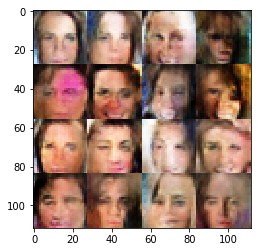

Epoch 1/1... Discriminator Loss: 1.3943 Generator Loss: 0.7693
Epoch 1/1... Discriminator Loss: 1.4425 Generator Loss: 0.7860
Epoch 1/1... Discriminator Loss: 1.3302 Generator Loss: 0.7635
Epoch 1/1... Discriminator Loss: 1.4040 Generator Loss: 0.6320
Epoch 1/1... Discriminator Loss: 1.2806 Generator Loss: 0.8882
Epoch 1/1... Discriminator Loss: 1.5058 Generator Loss: 0.6455
Epoch 1/1... Discriminator Loss: 1.2267 Generator Loss: 1.0004
Epoch 1/1... Discriminator Loss: 1.3393 Generator Loss: 0.9181
Epoch 1/1... Discriminator Loss: 1.3422 Generator Loss: 0.7929
Epoch 1/1... Discriminator Loss: 1.4919 Generator Loss: 0.6966


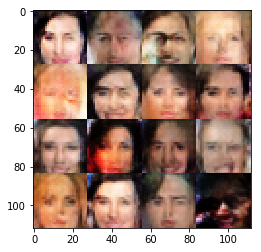

Epoch 1/1... Discriminator Loss: 1.4204 Generator Loss: 0.7947
Epoch 1/1... Discriminator Loss: 1.3277 Generator Loss: 0.9611
Epoch 1/1... Discriminator Loss: 1.2785 Generator Loss: 0.7066


In [37]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。